### Case Study: Lead Scoring of X Education Firm

In [4]:
# Import all needed packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Supress the Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data Scaling package
from sklearn.preprocessing import scale

# Import Other required packages
from sklearn.datasets import fetch_mldata
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
LeadScore =pd.read_csv("Leads.csv")
##country_details = pd.read_csv("Country_data_Dibyalok.csv")
LeadScore.head(20)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
# dataframe inspection
LeadScore.shape

(9240, 37)

In [7]:
LeadScore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Now let us check the NULL Values

In [9]:
# Let us check the missing values in each column
LeadScore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Null Value Metrics, if any
percentage = pd.DataFrame(round(100*(LeadScore.isnull().sum()/LeadScore.shape[0]),4).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([percentage], axis = 1)

,Percentage
Lead Quality,51.5909
Asymmetrique Profile Score,45.6494
Asymmetrique Activity Score,45.6494
Asymmetrique Profile Index,45.6494
Asymmetrique Activity Index,45.6494
Tags,36.2879
What matters most to you in choosing a course,29.3182
Lead Profile,29.3182
What is your current occupation,29.1126
Country,26.6342


In [11]:
### From above. remove all columns where %of missing values > 45%

In [12]:
LeadScore.drop(['Lead Quality','Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index',  
            'Asymmetrique Activity Index', ], axis = 1, inplace = True)

In [13]:
LeadScore.shape

(9240, 32)

In [14]:
# We have to remove columns which has only one unique value as these columns won't predict any lead case
LeadScore= LeadScore.loc[:,LeadScore.nunique()!=1]

In [15]:
LeadScore.shape

(9240, 27)

In [16]:
LeadScore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [17]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [18]:
# Deleting the columns 'What matters most to you in choosing a course' and 'How did you hear about X Education'
#it mostly has unique values and some null values.

LeadScore = LeadScore.drop('How did you hear about X Education', axis=1)
LeadScore.shape

(9240, 26)

In [19]:
LeadScore = LeadScore.drop('What matters most to you in choosing a course', axis=1)
LeadScore.shape

(9240, 25)

In [20]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Country                                   6779 non-null object
Specialization                            7802 non-null object
What is your current occupation           6550 non-null object
Search      

In [21]:
# Let us check the number of null values again
LeadScore.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            1438
What is your current occupation           2690
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Tags                                      3353
Lead Profile 

In [22]:
#unique id, not useful.
LeadScore = LeadScore.drop('Lead Number',1)

In [23]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
What is your current occupation           29.11
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                      36.29
Lead Profile                            

In [24]:
# Lets us look at the Country Field
LeadScore.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Ghana                      2
Netherlands                2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
China                      2
Uganda                     2
Philippines                2
Bangladesh                 2
Liberia                    1
Russia                     1
Sri Lanka                  1
Tanzania                   1
Switzerland                1
Vietnam                    1
Kenya         

In [25]:
# We an drop the country column as it is not having more variance
LeadScore=LeadScore.drop('Country',axis=1)

In [26]:
# Lets us look at the City Field
LeadScore.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
#Fill the Select entries with Nan, with Select being the default entry when no action taken
LeadScore.loc[LeadScore.City == 'Select',['City']] = np.nan

In [28]:
LeadScore.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
round(100*(LeadScore['City'].isnull().sum()/len(LeadScore.index)), 4)

39.7078

In [30]:
#As it has around 40% of Null Values we can drop the city column
LeadScore=LeadScore.drop('City',1)

In [31]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 4)

Prospect ID                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
Specialization                            15.5628
What is your current occupation           29.1126
Search                                     0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Tags                                      36.2879
Lead Profile                              29.3182


In [32]:
#Lets us check the Specialization Column
LeadScore.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
#Change the 'Select' vlaues to null. And check the null counts.
LeadScore.loc[LeadScore.Specialization == 'Select',['Specialization']] = np.nan

In [34]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 4)

Prospect ID                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
Specialization                            36.5801
What is your current occupation           29.1126
Search                                     0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Tags                                      36.2879
Lead Profile                              29.3182


In [35]:
# We see from the above that the columns "Tags" and "Specialization" have more than 36% Null Values. We can remove these columns
LeadScore.drop(['Tags','Specialization', ], axis = 1, inplace = True)

In [36]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 4)

Prospect ID                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Do Not Call                                0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
What is your current occupation           29.1126
Search                                     0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Lead Profile                              29.3182
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000


In [37]:
LeadScore['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [38]:
# We can see from the above the column "Do Not Call" almost has all values as No(99.98%). Hence this will not be very relevant 
# from predict leads perspective and can be dropped
LeadScore=LeadScore.drop('Do Not Call',1)

In [39]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 4)

Prospect ID                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
What is your current occupation           29.1126
Search                                     0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
Lead Profile                              29.3182
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

In [40]:
LeadScore['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [41]:
# Around 50% of the Lead Profile is select and we can drop this column also
LeadScore = LeadScore.drop('Lead Profile',1)

In [42]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)), 4)

Prospect ID                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
What is your current occupation           29.1126
Search                                     0.0000
Newspaper Article                          0.0000
X Education Forums                         0.0000
Newspaper                                  0.0000
Digital Advertisement                      0.0000
Through Recommendations                    0.0000
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

In [43]:
LeadScore.shape

(9240, 18)

In [44]:
# Lets Us now Begin the next steps as we have now cleaned the DataSet

In [45]:
LeadScore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [46]:
# Creation of Dummy Variables

In [47]:
# List of variables to map
varlist =  ['Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
LeadScore[varlist] = LeadScore[varlist].apply(binary_map)

In [48]:
LeadScore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,Modified


In [49]:
# we get dummies for the remaining categorical variables
LeadScore1=pd.get_dummies(LeadScore,columns=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                               'Last Notable Activity'],drop_first=True)

In [50]:
LeadScore1.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# We get our continuous variable
con_var=LeadScore[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [52]:
con_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [53]:
# OUTLIER CHECK

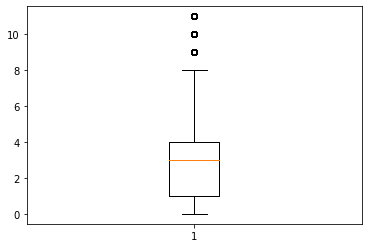

In [54]:
# Lets us do the Outlier Check

Q1 = LeadScore1.TotalVisits.quantile(0.25)
Q3 = LeadScore1.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
LeadScore1 = LeadScore1[(LeadScore1.TotalVisits >= Q1 - 1.5*IQR) & (LeadScore1.TotalVisits <= Q3 + 1.5*IQR)]
plt.boxplot(LeadScore1.TotalVisits)
plt.show()

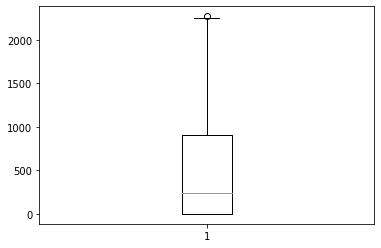

In [55]:
Q1 = LeadScore1['Total Time Spent on Website'].quantile(0.25)
Q3 = LeadScore1['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
df1 = LeadScore1[(LeadScore1['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (LeadScore1['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.boxplot(LeadScore1['Total Time Spent on Website'])
plt.show()

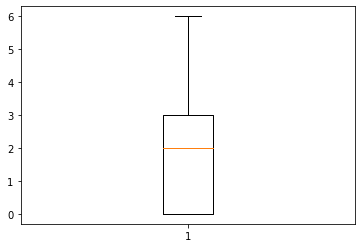

In [56]:
Q1 = LeadScore1['Page Views Per Visit'].quantile(0.25)
Q3 = LeadScore1['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
LeadScore1 = LeadScore1[(LeadScore1['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (LeadScore1['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(LeadScore1['Page Views Per Visit'])
plt.show()

In [57]:
con_var=LeadScore1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
con_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8542.000000,8542.000000,8542.000000
mean,2.810700,469.778740,2.076613
std,2.435562,542.851967,1.654045
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,233.000000,2.000000
75%,4.000000,888.750000,3.000000
90%,6.000000,1366.000000,4.000000
95%,7.000000,1551.000000,5.000000
99%,10.000000,1838.180000,6.000000


In [58]:
LeadScore1.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Creating a copy of this origial variable in case if needed later on
original_leads = LeadScore.copy()
print(original_leads.shape)
print(LeadScore.shape)

(9240, 18)
(9240, 18)


### TEST-TRAIN SPLIT

In [60]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X

X = LeadScore1.drop(['Converted','Prospect ID'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
# Putting response variable to y
y = LeadScore1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Let's do the Feature Scaling Now

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
colsumnsToScale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[colsumnsToScale] = scaler.fit_transform(X_train[colsumnsToScale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1384,0,0.886460,-0.337463,1.783827,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,-1.145025,-0.860893,-1.254234,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3514,0,-1.145025,-0.860893,-1.254234,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5930,0,0.480163,0.301267,1.176215,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1409,0,-0.332431,-0.857232,-0.039010,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
lead_conversion = (sum(LeadScore1['Converted'])/len(LeadScore1['Converted'].index))*100
lead_conversion

37.83657223132756

In [66]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2322.3
Date:                Mon, 20 Apr 2020   Deviance:                       4644.7
Time:                        20:57:29   Pearson chi2:                 5.85e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1085   7.98e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.3690      0.233     -5.885      0.000      -1.825      -0.913
TotalVisits                                              0.2793      0.058      4.853      0.000       0.166       0.392
Total Time Spent on Website                              1.0880      0.043     25.145      0.000       1.003       1.173
Page Views Per Visit                                    -0.2067      0.066     -3.147      0.002      -0.335      -0.078
Search                                                  -1.0490      1.346     -0.780      0.436      -3.686       1.588
Newspaper Article                                    -9.526e-09   2.39e-05     -0.000      1.000   -4.68e-05    4.68e-05
X Education Forums                                    1.322e-08   3.68e-05      0.000      1.000    -7.2e-05     7.2e-05
Newspaper                                              -25.9902   8.98e+04     -0.000      1.000   -1.76e+05    1.76e+05
Digital Advertisement                                   -0.0830      1.504     -0.055      0.956      -3.031       2.865
Through Recommendations                                  1.0857      1.984      0.547      0.584      -2.804       4.975
A free copy of Mastering The Interview                  -0.1048      0.117     -0.899      0.369      -0.334       0.124
Lead Origin_Landing Page Submission                     -0.1310      0.117     -1.119      0.263      -0.361       0.099
Lead Origin_Lead Add Form                                1.1753      1.478      0.795      0.427      -1.722       4.073
Lead Origin_Lead Import                                -24.0922   7.88e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Origin_Quick Add Form                           -5.186e-10   7.99e-06  -6.49e-05      1.000   -1.57e-05    1.57e-05
Lead Source_Direct Traffic                              -2.5566      1.665     -1.535      0.125      -5.821       0.707
Lead Source_Facebook                                    22.2808   7.88e+04      0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Google                                      -2.3011      1.662     -1.384      0.166      -5.559       0.957
Lead Source_Live Chat                                   20.3935    5.6e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      21.9018    7.7e+04      0.000      1.000   -1.51e+05    1.51e+05
Lead Source_Olark Chat                                  -1.1331      1.663     -0.681      0.496      -4.392       2.126
Lead Source_Organic Search                              -2

### RFE

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.1
Date:                Mon, 20 Apr 2020   Deviance:                       5010.1
Time:                        20:57:31   Pearson chi2:                 5.99e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6306      0.074      8.478      0.000       0.485       0.776
Do Not Email                                            -1.4381      0.200     -7.203      0.000      -1.829      -1.047
Total Time Spent on Website                              0.9254      0.036     25.357      0.000       0.854       0.997
Lead Origin_Lead Add Form                                3.4763      0.225     15.466      0.000       3.036       3.917
Lead Source_Direct Traffic                              -0.5325      0.080     -6.638      0.000      -0.690      -0.375
Lead Source_Welingak Website                             2.4881      1.036      2.402      0.016       0.458       4.518
Last Activity_Converted to Lead                         -1.2525      0.221     -5.659      0.000      -1.686      -0.819
Last Activity_Email Bounced                             -1.4826      0.434     -3.415      0.001      -2.334      -0.632
Last Activity_Olark Chat Conversation                   -1.2157      0.198     -6.135      0.000      -1.604      -0.827
What is your current occupation_Housewife               21.9560   1.46e+04      0.002      0.999   -2.85e+04    2.86e+04
What is your current occupation_Working Professional     2.8118      0.195     14.413      0.000       2.429       3.194
Last Notable Activity_Email Link Clicked                -2.0641      0.294     -7.023      0.000      -2.640      -1.488
Last Notable Activity_Email Opened                      -1.4889      0.091    -16.443      0.000      -1.666      -1.311
Last Notable Activity_Modified                          -1.7320      0.102    -16.958      0.000      -1.932      -1.532
Last Notable Activity_Olark Chat Conversation           -1.5568      0.391     -3.978      0.000      -2.324      -0.790
Last Notable Activity_Page Visited on Website           -1.8345      0.216     -8.493      0.000      -2.258      -1.411
========================================================================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.236733
2019    0.860709
3514    0.458562
5930    0.134342
1409    0.081120
1484    0.042107
4711    0.255262
9061    0.645145
3233    0.980853
7797    0.050277
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23673315, 0.86070906, 0.45856158, 0.13434244, 0.08112   ,
       0.04210712, 0.25526155, 0.64514526, 0.98085325, 0.05027747])

In [74]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.236733,1384
1,1,0.860709,2019
2,1,0.458562,3514
3,0,0.134342,5930
4,0,0.081120,1409


In [75]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [76]:
# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.236733,1384,0
1,1,0.860709,2019,1
2,1,0.458562,3514,0
3,0,0.134342,5930,0
4,0,0.081120,1409,0


In [77]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.236733,1384,0,23.673315
1,1,0.860709,2019,1,86.070906
2,1,0.458562,3514,0,45.856158
3,0,0.134342,5930,0,13.434244
4,0,0.081120,1409,0,8.112000


In [78]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3254  433]
 [ 757 1535]]


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.800970061883258


In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.98
7,Last Activity_Olark Chat Conversation,1.86
0,Do Not Email,1.70
6,Last Activity_Email Bounced,1.66
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Direct Traffic,1.37
13,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.30
5,Last Activity_Converted to Lead,1.25
11,Last Notable Activity_Email Opened,1.17


In [82]:
#dropping "Lead Origin_Lead Add Form" having high vif
col = col.drop('Lead Origin_Lead Add Form', 1)

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.8
Date:                Mon, 20 Apr 2020   Deviance:                       5413.7
Time:                        20:57:32   Pearson chi2:                 5.81e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8739      0.071     12.232      0.000       0.734       1.014
Do Not Email                                            -1.2034      0.181     -6.653      0.000      -1.558      -0.849
Total Time Spent on Website                              0.7853      0.035     22.629      0.000       0.717       0.853
Lead Source_Direct Traffic                              -0.7326      0.078     -9.369      0.000      -0.886      -0.579
Lead Source_Welingak Website                             5.5668      1.013      5.494      0.000       3.581       7.553
Last Activity_Converted to Lead                         -1.4325      0.219     -6.543      0.000      -1.862      -1.003
Last Activity_Email Bounced                             -1.8671      0.428     -4.363      0.000      -2.706      -1.028
Last Activity_Olark Chat Conversation                   -1.5387      0.194     -7.936      0.000      -1.919      -1.159
What is your current occupation_Housewife               21.7484   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Working Professional     3.0896      0.187     16.562      0.000       2.724       3.455
Last Notable Activity_Email Link Clicked                -1.9889      0.271     -7.343      0.000      -2.520      -1.458
Last Notable Activity_Email Opened                      -1.5104      0.087    -17.398      0.000      -1.681      -1.340
Last Notable Activity_Modified                          -1.6778      0.097    -17.371      0.000      -1.867      -1.489
Last Notable Activity_Olark Chat Conversation           -1.3674      0.375     -3.649      0.000      -2.102      -0.633
Last Notable Activity_Page Visited on Website           -1.8676      0.205     -9.109      0.000      -2.269      -1.466
========================================================================================================================
"""

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.288751
2019    0.212069
3514    0.549304
5930    0.142388
1409    0.098887
1484    0.075595
4711    0.306473
9061    0.588365
3233    0.987661
7797    0.062490
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28875122, 0.21206884, 0.54930417, 0.14238848, 0.09888704,
       0.07559533, 0.30647285, 0.58836498, 0.98766101, 0.0624899 ])

In [86]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.288751,1384
1,1,0.212069,2019
2,1,0.549304,3514
3,0,0.142388,5930
4,0,0.098887,1409


In [87]:
# Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [88]:
# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.288751,1384,0
1,1,0.212069,2019,0
2,1,0.549304,3514,1
3,0,0.142388,5930,0
4,0,0.098887,1409,0


In [89]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.288751,1384,0,28.875122
1,1,0.212069,2019,0,21.206884
2,1,0.549304,3514,1,54.930417
3,0,0.142388,5930,0,14.238848
4,0,0.098887,1409,0,9.888704


In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3202  485]
 [ 737 1555]]


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7956179963204549


In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.96
6,Last Activity_Olark Chat Conversation,1.84
0,Do Not Email,1.69
5,Last Activity_Email Bounced,1.65
2,Lead Source_Direct Traffic,1.36
12,Last Notable Activity_Olark Chat Conversation,1.33
4,Last Activity_Converted to Lead,1.24
10,Last Notable Activity_Email Opened,1.16
1,Total Time Spent on Website,1.09
8,What is your current occupation_Working Profes...,1.05


In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.8
Date:                Mon, 20 Apr 2020   Deviance:                       5413.7
Time:                        20:57:32   Pearson chi2:                 5.81e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8739      0.071     12.232      0.000       0.734       1.014
Do Not Email                                            -1.2034      0.181     -6.653      0.000      -1.558      -0.849
Total Time Spent on Website                              0.7853      0.035     22.629      0.000       0.717       0.853
Lead Source_Direct Traffic                              -0.7326      0.078     -9.369      0.000      -0.886      -0.579
Lead Source_Welingak Website                             5.5668      1.013      5.494      0.000       3.581       7.553
Last Activity_Converted to Lead                         -1.4325      0.219     -6.543      0.000      -1.862      -1.003
Last Activity_Email Bounced                             -1.8671      0.428     -4.363      0.000      -2.706      -1.028
Last Activity_Olark Chat Conversation                   -1.5387      0.194     -7.936      0.000      -1.919      -1.159
What is your current occupation_Housewife               21.7484   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Working Professional     3.0896      0.187     16.562      0.000       2.724       3.455
Last Notable Activity_Email Link Clicked                -1.9889      0.271     -7.343      0.000      -2.520      -1.458
Last Notable Activity_Email Opened                      -1.5104      0.087    -17.398      0.000      -1.681      -1.340
Last Notable Activity_Modified                          -1.6778      0.097    -17.371      0.000      -1.867      -1.489
Last Notable Activity_Olark Chat Conversation           -1.3674      0.375     -3.649      0.000      -2.102      -0.633
Last Notable Activity_Page Visited on Website           -1.8676      0.205     -9.109      0.000      -2.269      -1.466
========================================================================================================================
"""

In [94]:
#drop 'What is your current occupation_Housewife' - having high p value
col = col.drop('What is your current occupation_Housewife', 1)

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.1
Date:                Mon, 20 Apr 2020   Deviance:                       5418.2
Time:                        20:57:33   Pearson chi2:                 5.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8747      0.071     12.243      0.000       0.735       1.015
Do Not Email                                            -1.2033      0.181     -6.652      0.000      -1.558      -0.849
Total Time Spent on Website                              0.7858      0.035     22.661      0.000       0.718       0.854
Lead Source_Direct Traffic                              -0.7350      0.078     -9.402      0.000      -0.888      -0.582
Lead Source_Welingak Website                             5.5654      1.013      5.492      0.000       3.579       7.551
Last Activity_Converted to Lead                         -1.4324      0.219     -6.542      0.000      -1.862      -1.003
Last Activity_Email Bounced                             -1.8674      0.428     -4.364      0.000      -2.706      -1.029
Last Activity_Olark Chat Conversation                   -1.5389      0.194     -7.937      0.000      -1.919      -1.159
What is your current occupation_Working Professional     3.0882      0.187     16.553      0.000       2.723       3.454
Last Notable Activity_Email Link Clicked                -1.9889      0.271     -7.343      0.000      -2.520      -1.458
Last Notable Activity_Email Opened                      -1.5064      0.087    -17.360      0.000      -1.676      -1.336
Last Notable Activity_Modified                          -1.6781      0.097    -17.372      0.000      -1.867      -1.489
Last Notable Activity_Olark Chat Conversation           -1.3680      0.375     -3.651      0.000      -2.102      -0.634
Last Notable Activity_Page Visited on Website           -1.8679      0.205     -9.110      0.000      -2.270      -1.466
========================================================================================================================
"""

In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.289707
2019    0.212800
3514    0.549395
5930    0.142412
1409    0.098680
1484    0.075621
4711    0.307475
9061    0.588227
3233    0.987658
7797    0.062464
dtype: float64

In [97]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28970738, 0.21279988, 0.549395  , 0.14241171, 0.09867957,
       0.0756214 , 0.3074747 , 0.58822658, 0.9876575 , 0.06246441])

In [98]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.289707,1384
1,1,0.212800,2019
2,1,0.549395,3514
3,0,0.142412,5930
4,0,0.098680,1409


In [99]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.289707,1384,0
1,1,0.212800,2019,0
2,1,0.549395,3514,1
3,0,0.142412,5930,0
4,0,0.098680,1409,0


In [100]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)

In [101]:
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.289707,1384,0,28.970738
1,1,0.212800,2019,0,21.279988
2,1,0.549395,3514,1,54.939500
3,0,0.142412,5930,0,14.241171
4,0,0.098680,1409,0,9.867957


In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3202  485]
 [ 737 1555]]


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7956179963204549


### It show from above the accuracy is still the same.

# Metrics beyond simply accuracy

In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6784467713787086

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8684567398969352

In [107]:
# Calculate false postive rate - predicting as hot leads when customer did not convert
print(FP/ float(TN+FP))

0.13154326010306483


In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.7622549019607843


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8128966742828129


In [110]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7622549019607843

### Plotting the ROC Curve

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Prob, drop_intermediate = False )

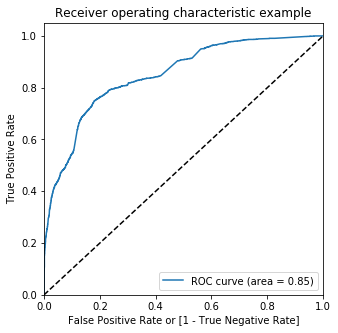

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

Optimal Cutoff Point

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289707,1384,0,28.970738,1,1,1,0,0,0,0,0,0,0
1,1,0.212800,2019,0,21.279988,1,1,1,0,0,0,0,0,0,0
2,1,0.549395,3514,1,54.939500,1,1,1,1,1,1,0,0,0,0
3,0,0.142412,5930,0,14.241171,1,1,0,0,0,0,0,0,0,0
4,0,0.098680,1409,0,9.867957,1,0,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.383342,1.000000,0.000000
0.1,0.1,0.553103,0.984293,0.285056
0.2,0.2,0.656130,0.908377,0.499322
0.3,0.3,0.767352,0.796684,0.749119
0.4,0.4,0.792440,0.745637,0.821535
0.5,0.5,0.795618,0.678447,0.868457
0.6,0.6,0.760495,0.507853,0.917548
0.7,0.7,0.754139,0.426702,0.957689
0.8,0.8,0.737582,0.352967,0.976675
0.9,0.9,0.696438,0.216405,0.994847


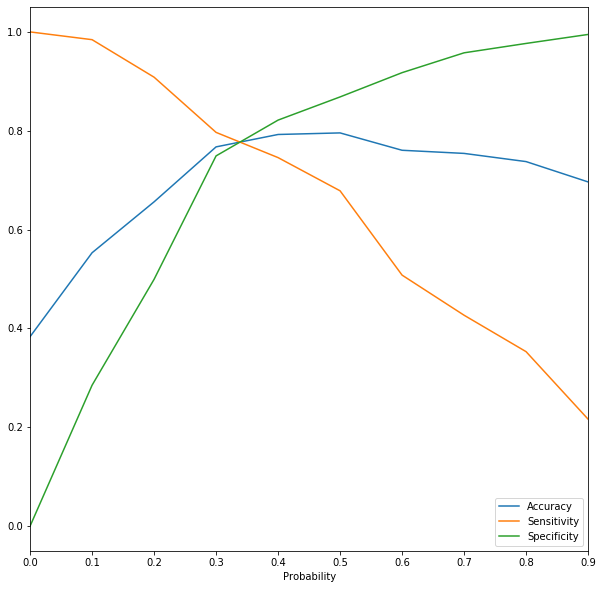

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize =(10,10))
plt.show()

In [117]:
#From the curve above, ~0.35 is the optimum point to take it as a cutoff probability.


In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.289707,1384,0,28.970738,1,1,1,0,0,0,0,0,0,0,0
1,1,0.212800,2019,0,21.279988,1,1,1,0,0,0,0,0,0,0,0
2,1,0.549395,3514,1,54.939500,1,1,1,1,1,1,0,0,0,0,1
3,0,0.142412,5930,0,14.241171,1,1,0,0,0,0,0,0,0,0,0
4,0,0.098680,1409,0,9.867957,1,0,0,0,0,0,0,0,0,0,0


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7825723365111222

Precision and Recall

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3202,  485],
       [ 737, 1555]], dtype=int64)

In [121]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7622549019607843

In [122]:
#Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6784467713787086

Precision and recall tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

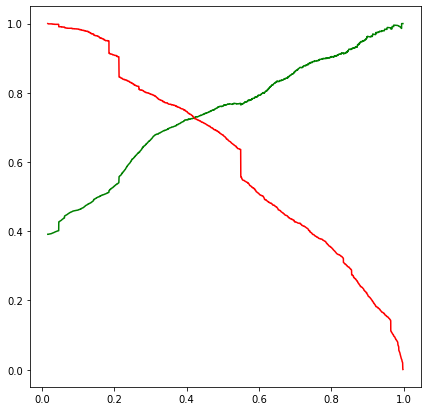

In [125]:
plt.figure(figsize=(7,7))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [126]:
X_test[colsumnsToScale] = scaler.transform(X_test[colsumnsToScale])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7191,0,1.165108,1,0,0,0,0,1,0,1,0,0,0
1008,0,-0.582706,0,0,0,0,0,0,0,1,0,0,0
3494,0,1.203542,1,0,0,0,0,0,0,0,0,0,0
3298,0,0.021250,1,0,0,0,0,0,0,0,0,0,0
5646,0,-0.860893,0,0,0,0,0,0,0,1,0,0,0


Making predictions on the test set

In [127]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
7191,0.933214
1008,0.251708
3494,0.747543
3298,0.539039
5646,0.212800


In [130]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [131]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [132]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [134]:
y_pred_final.head()

,Converted,CustID,0
0,0,7191,0.933214
1,1,1008,0.251708
2,1,3494,0.747543
3,1,3298,0.539039
4,1,5646,0.212800


In [135]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [136]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Lead_Prob'], axis=1)

In [137]:
y_pred_final.head()

,CustID,Converted,Lead_Prob
0,7191,0,0.933214
1,1008,1,0.251708
2,3494,1,0.747543
3,3298,1,0.539039
4,5646,1,0.212800


In [138]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [139]:
y_pred_final['lead_score']= y_pred_final.Lead_Prob.map(lambda x: x*100)

In [140]:
y_pred_final.head()

,CustID,Converted,Lead_Prob,final_predicted,lead_score
0,7191,0,0.933214,1,93.321423
1,1008,1,0.251708,0,25.170788
2,3494,1,0.747543,1,74.754282
3,3298,1,0.539039,1,53.903887
4,5646,1,0.212800,0,21.279988


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7701911822083496

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1252,  371],
       [ 218,  722]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7680851063829788

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.7714109673444239

Precision and Recall

In [146]:
#Precision
#TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6605672461116194

In [147]:
#Recall
#TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7680851063829788

Business Requirement has given a ballpark of the target lead conversion rate to be around 80%.

Therefore we increase our cutoff for lead probability to 0.5 inorder to achieve a precision above 80%


In [148]:
# Appending y_test_df and y_pred_1
y_pred_final2 = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final2.head()

,Converted,CustID,0
0,0,7191,0.933214
1,1,1008,0.251708
2,1,3494,0.747543
3,1,3298,0.539039
4,1,5646,0.212800


In [150]:
# Renaming the column 
y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Lead_Prob'})

In [151]:
# Rearranging the columns
y_pred_final2 = y_pred_final2.reindex(['CustID','Converted','Lead_Prob'], axis=1)

In [152]:
y_pred_final2.head()

,CustID,Converted,Lead_Prob
0,7191,0,0.933214
1,1008,1,0.251708
2,3494,1,0.747543
3,3298,1,0.539039
4,5646,1,0.212800


In [153]:
y_pred_final2['final_predicted'] = y_pred_final2.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [154]:
y_pred_final2['lead_score']= y_pred_final2.Lead_Prob.map(lambda x: x*100)

In [155]:
y_pred_final2.head()

,CustID,Converted,Lead_Prob,final_predicted,lead_score
0,7191,0,0.933214,1,93.321423
1,1008,1,0.251708,0,25.170788
2,3494,1,0.747543,1,74.754282
3,3298,1,0.539039,1,53.903887
4,5646,1,0.212800,0,21.279988


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final2.Converted, y_pred_final2.final_predicted)

0.7889192352711666

In [157]:
confusion3 = metrics.confusion_matrix(y_pred_final2.Converted, y_pred_final2.final_predicted )
confusion3

array([[1377,  246],
       [ 295,  645]], dtype=int64)

In [158]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6861702127659575

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8484288354898336

Precision

In [161]:
#TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7239057239057239

In [162]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,CustID,Converted,Lead_Prob,final_predicted,lead_score
0,7191,0,0.933214,1,93.321423
1,1008,1,0.251708,0,25.170788
2,3494,1,0.747543,1,74.754282
3,3298,1,0.539039,1,53.903887
4,5646,1,0.212800,0,21.279988


In [163]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Lead_Prob,CustID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.289707,1384,0,28.970738,1,1,1,0,0,0,0,0,0,0,0
1,1,0.212800,2019,0,21.279988,1,1,1,0,0,0,0,0,0,0,0
2,1,0.549395,3514,1,54.939500,1,1,1,1,1,1,0,0,0,0,1
3,0,0.142412,5930,0,14.241171,1,1,0,0,0,0,0,0,0,0,0
4,0,0.098680,1409,0,9.867957,1,0,0,0,0,0,0,0,0,0,0


In [164]:
# Dropping unnecessary columns from train dataset
#leads_train_pred = leads_train_pred[['Converted','final_predicted']]
#leads_train_pred.head()

In [165]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,CustID,Lead_Prob,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1384,0.289707,28.970738,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2019,0.212800,21.279988,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,3514,0.549395,54.939500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
3,0,5930,0.142412,14.241171,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,1409,0.098680,9.867957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [166]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,CustID,Lead_Prob,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1384,0.289707,28.970738,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2019,0.212800,21.279988,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,3514,0.549395,54.939500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
3,0,5930,0.142412,14.241171,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,1409,0.098680,9.867957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [167]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5979, 16)
(2563, 5)
(8542, 16)


In [168]:
# Ensuring the LeadIDs are unique for each lead in the final dataframe
len(lead_full_pred['CustID'].unique().tolist())

8542

In [169]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Lead_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,CustID,Lead_Prob,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,1384,0.289707,28.970738,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,29
1,1,2019,0.212800,21.279988,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21
2,1,3514,0.549395,54.939500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,55
3,0,5930,0.142412,14.241171,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14
4,0,1409,0.098680,9.867957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10


In [170]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5979, 16)
(2563, 5)
(8542, 17)


In [171]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['CustID'].unique().tolist())

8542

In [172]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Lead_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,CustID,Lead_Prob,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,1384,0.289707,28.970738,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,29
1,1,2019,0.212800,21.279988,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21
2,1,3514,0.549395,54.939500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,55
3,0,5930,0.142412,14.241171,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14
4,0,1409,0.098680,9.867957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10


In [173]:
# Inspecing the max LeadID
lead_full_pred.CustID.max()

9239

In [174]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('CustID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Lead_Prob,lead_score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
CustID,,,,,,,,,,,,,,,,
0,0,0.185443,18.544326,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19
1,0,0.416105,41.610469,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,42
2,1,0.539971,53.997080,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,54
3,0,0.144772,14.477190,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14
4,1,0.297641,29.764086,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30


In [175]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(11)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,54.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Unemployed,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,71.0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,0,0,4.0,58,4.0,Email Opened,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0


In [176]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 34)

In [177]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
predicted,3261,35.29
0.0,3261,35.29
0.9,3261,35.29
0.8,3261,35.29
0.7,3261,35.29
0.6,3261,35.29
0.5,3261,35.29
0.4,3261,35.29
0.3,3261,35.29
0.2,3261,35.29


In [178]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.20
Total Time Spent on Website                             0.79
Lead Source_Direct Traffic                             -0.73
Lead Source_Welingak Website                            5.57
Last Activity_Converted to Lead                        -1.43
Last Activity_Email Bounced                            -1.87
Last Activity_Olark Chat Conversation                  -1.54
What is your current occupation_Working Professional    3.09
Last Notable Activity_Email Link Clicked               -1.99
Last Notable Activity_Email Opened                     -1.51
Last Notable Activity_Modified                         -1.68
Last Notable Activity_Olark Chat Conversation          -1.37
Last Notable Activity_Page Visited on Website          -1.87
dtype: float64

In [179]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -21.62
Total Time Spent on Website                             14.12
Lead Source_Direct Traffic                             -13.21
Lead Source_Welingak Website                           100.00
Last Activity_Converted to Lead                        -25.74
Last Activity_Email Bounced                            -33.55
Last Activity_Olark Chat Conversation                  -27.65
What is your current occupation_Working Professional    55.49
Last Notable Activity_Email Link Clicked               -35.74
Last Notable Activity_Email Opened                     -27.07
Last Notable Activity_Modified                         -30.15
Last Notable Activity_Olark Chat Conversation          -24.58
Last Notable Activity_Page Visited on Website          -33.56
dtype: float64

In [180]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             8
Total Time Spent on Website                             12
Lead Source_Direct Traffic                               5
Lead Source_Welingak Website                            10
Last Activity_Converted to Lead                          6
Last Activity_Email Bounced                              9
Last Activity_Olark Chat Conversation                    4
What is your current occupation_Working Professional    11
Last Notable Activity_Email Link Clicked                 0
Last Notable Activity_Email Opened                       2
Last Notable Activity_Modified                           1
Last Notable Activity_Olark Chat Conversation            7
Last Notable Activity_Page Visited on Website            3
dtype: int64

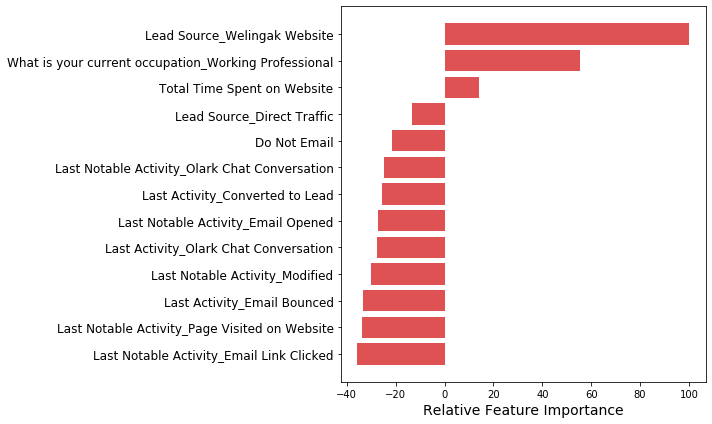

In [181]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [182]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Lead Source_Welingak Website,100.00
7,What is your current occupation_Working Profes...,55.49
1,Total Time Spent on Website,14.12


### Final Summary

### The most likely leads stamding a good chance at converting / identifying customers for Education Form X (that sells online classes to Industry professionals) stand as below
#### 1) Welingak Website as a "Lead Source" to attract customers
#### 2) Working Professionals standing a good chance over Student community or Unemployed lot
#### 3) Folks who spend a decent ampount of time on the web site doing R&D. 

#### This outcome gets identified based on the above staged / performed Lead Scores Case Study.

#### There were couple of inferences we could also make from this case study
#### A) The "Conversion Probability" is directly proportional to increase in values of the identified THREE above
#### B) The "Conversion Probability" is inversely proportional to "Tags" parameter depicting as minimum values as possible
#### C) Sensitivity factor is inversely proportional to Specificity